# Project: Wrangling and Analyze Data

## Table of Contents

<ul>
<li><a href="#introduction">Introduction</a></li>
<li><a href="#Data Gathering">Data Gathering</a></li>
<li><a href="#Assesing Data">Assesing Data</a></li>
<li><a href="#Quality issues">Quality Issues</a></li>
<li><a href="#Tidiness issues">TIdiness Issues</a></li>
<li><a href="#Cleaning Data">Cleaning Data</a></li>
<li><a href="Storing Data">Storing Data</a></li>
<li><a href="#Analyzing and Visualizing Data">Analyzing and Visualizing Data</a></li>
<li><a href="#Conclusion">Conclusion</a></li>

</ul>

# Introduction

The purpose of the project is to analyze the WeRateDogs twitter page. The project involves three processes, gathering the data, assesing the data for quality and tidiness issues and then finally cleaning the data. 

# Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#import libraries to be used
import pandas as pd
import numpy as np
import requests,json
import sys
import re
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#get the csv into a data frame
tweets_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweets_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#acces the tsv file using the .get method
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image-predictions.tsv', mode = 'wb')as file:
    file.write(response.content)

In [5]:
# get the previously downloaded (images_prediction) data into a dataframe
images_pred = pd.read_csv('image-predictions.tsv', sep = '\t')
images_pred 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [273]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweets_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
854: 765371061932261376
Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 7599

Fail
1132: 728986383096946689
Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165:

Fail
1406: 699323444782047232
Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439:

Fail
1680: 682032003584274432
Fail
1681: 682003177596559360
Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713:

Fail
1954: 673662677122719744
Fail
1955: 673656262056419329
Fail
1956: 673636718965334016
Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987:

Fail
2228: 668268907921326080
Fail
2229: 668256321989451776
Fail
2230: 668248472370458624
Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261:

In [6]:
#without the twitter authorization, used the file provided in the course as an alternative
with open ('tweet_json.txt', encoding = 'utf-8') as f:
    for item in f.readlines():
        item = json.loads(item)
        tweet_id = item['id']
        created_at = item['created_at']
        print(created_at)
        break


Tue Aug 01 16:23:56 +0000 2017


In [7]:
#save the data from the text file in a new data frame
tweets = []
with open('tweet_json.txt') as f:
    for item in f:
        item  = json.loads(item)
        tweet_id = item['id']
        created_at = item['created_at'][:3]
        text = item['full_text']
        retweet_count = item['retweet_count']
        favorite_count = item['favorite_count']
        
        tweets.append({'tweet_id': tweet_id,
                      'text' : text,
                      'day' : created_at,
                      'retweet_count': retweet_count,
                      'favorite_count' : favorite_count })
tweets_json = pd.DataFrame(tweets)
tweets_json

,tweet_id,text,day,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Tue,8853,39467
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tue,6514,33819
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Mon,4328,25461
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Sun,8964,42908
4,891327558926688256,This is Franklin. He would like you to stop ca...,Sat,9774,41048
...,...,...,...,...,...
2349,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,Mon,41,111
2350,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,Mon,147,311
2351,666033412701032449,Here is a very happy pup. Big fan of well-main...,Sun,47,128
2352,666029285002620928,This is a western brown Mitsubishi terrier. Up...,Sun,48,132


# Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### 1. Twitter Archived Enhanced Data

In [8]:
#asses the data frames starting with the twitter archive 
tweets_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
#print the information about the dataset
tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
#print the datatypes for the dataset so as to view which one wou;d need to be changed.
tweets_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [11]:
#check the source column for assesment
tweets_archive.source

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object

In [12]:
tweets_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [13]:
tweets_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
54,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595...,13,10,Gary,None,None,None,None
1206,715758151270801409,NaN,NaN,2016-04-01 04:30:16 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is old now but it's absolutely heckin fan...,NaN,NaN,NaN,https://vine.co/v/hYdLVKDpAFu,13,10,old,None,None,None,None
921,756288534030475264,NaN,NaN,2016-07-22 00:43:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a heartwarming scene of a single father...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756288534...,12,10,None,None,None,None,None
842,766793450729734144,NaN,NaN,2016-08-20 00:26:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rufus. He just missed out on the 100m ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766793450...,10,10,Rufus,None,None,None,None
1698,681193455364796417,NaN,NaN,2015-12-27 19:22:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. He's astronomically fluffy. I w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681193455...,11,10,Aspen,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None
1714,680440374763077632,NaN,NaN,2015-12-25 17:30:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Merry Christmas. My gift to you is this tiny u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680440374...,11,10,None,None,None,None,None
890,759566828574212096,NaN,NaN,2016-07-31 01:50:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This... is a Tyrannosaurus rex....,7.395441e+17,4.196984e+09,2016-06-05 19:47:03 +0000,https://twitter.com/dog_rates/status/739544079...,10,10,None,None,None,None,None
2031,671768281401958400,NaN,NaN,2015-12-01 19:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you try to recreate the scene from Lady &...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671768281...,10,10,None,None,None,None,None
1129,729463711119904772,NaN,NaN,2016-05-09 00:11:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pupcasso. You can't afford his art. 13/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/729463711...,13,10,Pupcasso,None,None,None,None


In [14]:
tweets_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
tweets_archive.name.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: name, Length: 2356, dtype: bool>

In [16]:
tweets_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [17]:
tweets_archive.isna()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


## Quality Issues
1. There are missing values in  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls.
2. split the timestamp column
3. timestamp is in object should be in dateand time format.
4. missing iinforamtion for the dog stages.
5. rating denomninator should not be more than 10.
6. doggo,floofer, pupper and puppeer should be combined into a single column.

## 2. Images Prediction Assesment

In [18]:
images_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
images_pred.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [133]:
images_pred.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [134]:
images_pred.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [135]:
images_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1523,788150585577050112,https://pbs.twimg.com/media/CvASw6dWcAQmo3X.jpg,3,chow,0.814145,True,Pomeranian,0.112704,True,Chihuahua,0.015883,True
176,669203728096960512,https://pbs.twimg.com/media/CUl9PGBVEAUV3Wz.jpg,1,pug,0.910452,True,French_bulldog,0.055090,True,Chihuahua,0.014897,True
878,698355670425473025,https://pbs.twimg.com/media/CbEOxQXW0AEIYBu.jpg,1,pug,0.990191,True,Pekinese,0.002799,True,sunglasses,0.001310,False
1627,804413760345620481,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True
1367,761745352076779520,https://pbs.twimg.com/media/CpJDWqhW8AAFt45.jpg,1,paddle,0.393118,False,canoe,0.178088,False,lakeside,0.099713,False


In [136]:
images_pred.isna()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,False,False,False,False,False,False,False,False,False,False,False,False
2071,False,False,False,False,False,False,False,False,False,False,False,False
2072,False,False,False,False,False,False,False,False,False,False,False,False
2073,False,False,False,False,False,False,False,False,False,False,False,False


## Quality 

7. types of dogs in colums p1, p2 and p3 has inconsistencies in naming.
8. names of dogs and confidence should be combined instead of having different columns.

In [137]:
tweets_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [138]:
tweets_json.sample(10)

,tweet_id,retweet_count,favorite_count
327,833722901757046785,3636,22585
1309,707021089608753152,1540,4433
399,824775126675836928,4069,16508
1182,718631497683582976,9126,20697
2239,667915453470232577,59,222
1369,702276748847800320,860,2706
61,880095782870896641,4533,28150
609,797236660651966464,7726,22328
1189,717841801130979328,670,2660
203,852936405516943360,2243,0


In [139]:
tweets_json.tail(5)

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [140]:
tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


# Quality issues
##### `tweets_archive` table
1. There are missing values in  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls.
2. split the timestamp column
3. timestamp is in object should be in dateand time format.
4. missing infromation for the dogs.
5. rating denomninator should not be more than 10.
6. remove retweets in the dataset.
##### `images_pred` table
7. types of dogs in colums p1, p2 and p3 has inconsistencies in naming.
8. names of dogs and confidence should be combined instead of having different columns.


# Tidiness issues
1. The three tables should be merged to one table

3. Some columns should be combined to one (doggo,floofer, pupper and puppo should be combined into a single column).

# Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [20]:
# Make copies of original pieces of data
tweets_archive_clean = tweets_archive.copy()
images_pred_clean = images_pred.copy()
tweets_json_clean = tweets_json .copy()

In [21]:
tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Before anything else, remove the retweets as we are only working with original tweet.

In [22]:

# Remove the retweets
tweets_archive_clean = tweets_archive_clean[tweets_archive_clean.retweeted_status_id.isnull()]

# Remove the replies
tweets_archive_clean = tweets_archive_clean[tweets_archive_clean.in_reply_to_status_id.isnull()]

### Issue #1: Naming

#### Define: 
Make the naming in the colums consistent as others are small letters while others are capital all naming should be consistent. Drop the hyphen between the names 

#### Code

In [23]:
#make the names all lower case
images_pred_clean['p1'] = images_pred_clean['p1'].str.lower()
images_pred_clean['p2'] = images_pred_clean['p2'].str.lower()
images_pred_clean['p3'] = images_pred_clean['p3'].str.lower()

In [24]:
#remove the separator from under score to space.
images_pred_clean.p1 = images_pred_clean.p1.str.replace('_', ' ')
images_pred_clean.p2 = images_pred_clean.p2.str.replace('_', ' ')
images_pred_clean.p3 = images_pred_clean.p3.str.replace('_', ' ')

In [25]:
images_pred_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True


#### Test

### Issue 2: Split the timestamp column

#### Define: 

The timestamp column should be split into two colums, the day and time column. After splitting drop the `timestamp` column and clean the two created 

### Code

In [26]:
#split the column
tweets_archive_clean[['day','time']] = tweets_archive_clean['timestamp'].str.split(' ', n=1, expand=True)
tweets_archive_clean['time'] = tweets_archive_clean.time.str[:-5]

In [27]:
#drop the timesamp column
tweets_archive_clean.drop('timestamp',axis=1,inplace=True)

### Test

In [28]:
tweets_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,day,time
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03


### Issue #3: Data types

#### Define: 
Fix the date and time columns to be in the format of date and time instead of string/object.

#### Code

In [29]:
tweets_archive_clean['day'] = pd.to_datetime(tweets_archive_clean['day'])
tweets_archive_clean['time'] = pd.to_datetime(tweets_archive_clean['time'])

#### Test

In [30]:
tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   source                      2097 non-null   object        
 4   text                        2097 non-null   object        
 5   retweeted_status_id         0 non-null      float64       
 6   retweeted_status_user_id    0 non-null      float64       
 7   retweeted_status_timestamp  0 non-null      object        
 8   expanded_urls               2094 non-null   object        
 9   rating_numerator            2097 non-null   int64         
 10  rating_denominator          2097 non-null   int64         
 11  name                        2097 non-null   object      

### Issue 4# Drop columns 

### Define
Drop columns with null values that will not be used in the analysis. This columns include: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id , and retweeted_status_timestamp in the in the `twitter_archive` table.

#### code

In [31]:
tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   source                      2097 non-null   object        
 4   text                        2097 non-null   object        
 5   retweeted_status_id         0 non-null      float64       
 6   retweeted_status_user_id    0 non-null      float64       
 7   retweeted_status_timestamp  0 non-null      object        
 8   expanded_urls               2094 non-null   object        
 9   rating_numerator            2097 non-null   int64         
 10  rating_denominator          2097 non-null   int64         
 11  name                        2097 non-null   object      

In [32]:
tweets_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                           'retweeted_status_user_id', 'retweeted_status_timestamp', 'text', 'expanded_urls'],axis=1,inplace=True)

In [33]:
tweets_archive_clean.drop([],axis=1,inplace=True)

In [34]:
tweets_json.drop([ 'text', 'day'],axis=1,inplace=True)

#### Test

In [35]:
tweets_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [36]:
tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   source              2097 non-null   object        
 2   rating_numerator    2097 non-null   int64         
 3   rating_denominator  2097 non-null   int64         
 4   name                2097 non-null   object        
 5   doggo               2097 non-null   object        
 6   floofer             2097 non-null   object        
 7   pupper              2097 non-null   object        
 8   puppo               2097 non-null   object        
 9   day                 2097 non-null   datetime64[ns]
 10  time                2097 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 196.6+ KB


### Issue 5 : Refine colums p1,p2,p3 and  confidence.

#### Define
Combine p1,p2 and p3 into one column and the confidence in another column. 
Create breed and confidence columns using else if statement and append to the data frame

#### Code

In [37]:
#create the code with it's level of confidence
breed = []
confidence = []

def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        confidence.append(0)

           
images_pred_clean.apply(breed_confidence, axis=1)
images_pred_clean['breed'] = breed
images_pred_clean['confidence'] = confidence

In [38]:
#drop the extra columsn that are not needed
images_pred_clean.drop(['jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

In [39]:
images_pred_clean

,tweet_id,breed,confidence
0,666020888022790149,welsh springer spaniel,0.465074
1,666029285002620928,redbone,0.506826
2,666033412701032449,german shepherd,0.596461
3,666044226329800704,rhodesian ridgeback,0.408143
4,666049248165822465,miniature pinscher,0.560311
...,...,...,...
2070,891327558926688256,basset,0.555712
2071,891689557279858688,labrador retriever,0.168086
2072,891815181378084864,chihuahua,0.716012
2073,892177421306343426,chihuahua,0.323581


In [40]:
images_pred_clean.breed

0       welsh springer spaniel
1                      redbone
2              german shepherd
3          rhodesian ridgeback
4           miniature pinscher
                 ...          
2070                    basset
2071        labrador retriever
2072                 chihuahua
2073                 chihuahua
2074            Unidentifiable
Name: breed, Length: 2075, dtype: object

In [41]:
#clean the breed column and remove the unidentifiable 
#change to Nan values
images_pred_clean.replace(to_replace=['Unidentifiable'], value=np.nan, inplace=True)

In [42]:
images_pred_clean.breed.value_counts()

golden retriever        173
labrador retriever      113
pembroke                 96
chihuahua                95
pug                      65
                       ... 
scotch terrier            1
entlebucher               1
japanese spaniel          1
standard schnauzer        1
bouvier des flandres      1
Name: breed, Length: 113, dtype: int64

In [43]:
#drop the Nan values
images_pred_clean.dropna()

,tweet_id,breed,confidence
0,666020888022790149,welsh springer spaniel,0.465074
1,666029285002620928,redbone,0.506826
2,666033412701032449,german shepherd,0.596461
3,666044226329800704,rhodesian ridgeback,0.408143
4,666049248165822465,miniature pinscher,0.560311
...,...,...,...
2069,891087950875897856,chesapeake bay retriever,0.425595
2070,891327558926688256,basset,0.555712
2071,891689557279858688,labrador retriever,0.168086
2072,891815181378084864,chihuahua,0.716012


In [44]:
images_pred_clean.breed.value_counts()

golden retriever        173
labrador retriever      113
pembroke                 96
chihuahua                95
pug                      65
                       ... 
scotch terrier            1
entlebucher               1
japanese spaniel          1
standard schnauzer        1
bouvier des flandres      1
Name: breed, Length: 113, dtype: int64

## Issue 6: Combine columns

#### Define:
In the `tweets_archive_clean` table doggo, floofer,pupper and puppo need to be in one column which will be named dog_stages.

#### Code

In [45]:
tweets_archive_clean= pd.melt(tweets_archive_clean, id_vars = ['tweet_id','source','rating_numerator','rating_denominator','name','day','time'],
                              var_name='dog_stages', value_name='dog_stage')

In [46]:
#drop the dog_stages column
tweets_archive_clean.drop('dog_stages',axis=1,inplace=True)

In [47]:
#drop the None values in dog_stage
tweets_archive_clean.replace(to_replace=['None'], value=np.nan, inplace=True)
tweets_archive_clean

,tweet_id,source,rating_numerator,rating_denominator,name,day,time,dog_stage
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Phineas,2017-08-01,2022-09-14 16:23:56,NaN
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Tilly,2017-08-01,2022-09-14 00:17:27,NaN
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Archie,2017-07-31,2022-09-14 00:18:03,NaN
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Darla,2017-07-30,2022-09-14 15:58:51,NaN
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Franklin,2017-07-29,2022-09-14 16:00:24,NaN
...,...,...,...,...,...,...,...,...
8383,666049248165822465,"<a href=""http://twitter.com/download/iphone"" r...",5,10,NaN,2015-11-16,2022-09-14 00:24:50,NaN
8384,666044226329800704,"<a href=""http://twitter.com/download/iphone"" r...",6,10,a,2015-11-16,2022-09-14 00:04:52,NaN
8385,666033412701032449,"<a href=""http://twitter.com/download/iphone"" r...",9,10,a,2015-11-15,2022-09-14 23:21:54,NaN
8386,666029285002620928,"<a href=""http://twitter.com/download/iphone"" r...",7,10,a,2015-11-15,2022-09-14 23:05:30,NaN


In [48]:
tweets_archive_clean.dropna(inplace = True)

#### Test

In [49]:
tweets_archive_clean

,tweet_id,source,rating_numerator,rating_denominator,name,day,time,dog_stage
9,890240255349198849,"<a href=""http://twitter.com/download/iphone"" r...",14,10,Cassie,2017-07-26,2022-09-14 15:59:51,doggo
39,884162670584377345,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Yogi,2017-07-09,2022-09-14 21:29:42,doggo
94,871515927908634625,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Napolean,2017-06-04,2022-09-14 23:56:03,doggo
104,869596645499047938,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Scout,2017-05-30,2022-09-14 16:49:31,doggo
192,846514051647705089,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Barney,2017-03-28,2022-09-14 00:07:32,doggo
...,...,...,...,...,...,...,...,...
6835,784183165795655680,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",12,10,Reginald,2016-10-07,2022-09-14 00:06:50,puppo
7044,751132876104687617,"<a href=""http://twitter.com/download/iphone"" r...",10,10,Cooper,2016-07-07,2022-09-14 19:16:47,puppo
7112,744995568523612160,"<a href=""http://twitter.com/download/iphone"" r...",9,10,Abby,2016-06-20,2022-09-14 20:49:19,puppo
7124,743253157753532416,"<a href=""http://twitter.com/download/iphone"" r...",10,10,Kilo,2016-06-16,2022-09-14 01:25:36,puppo


In [50]:
tweets_archive_clean.dog_stage.value_counts()

pupper     137
doggo       45
puppo       16
floofer      5
Name: dog_stage, dtype: int64

## Issue 7 :  Source column needs to be modified

### Define
The source column content is not readable the cleaaning process will make it more readable to find the device used to tweet.

#### code

In [51]:
tweets_archive_clean['source'] = tweets_archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [52]:
tweets_archive_clean

,tweet_id,source,rating_numerator,rating_denominator,name,day,time,dog_stage
9,890240255349198849,Twitter for iPhone,14,10,Cassie,2017-07-26,2022-09-14 15:59:51,doggo
39,884162670584377345,Twitter for iPhone,12,10,Yogi,2017-07-09,2022-09-14 21:29:42,doggo
94,871515927908634625,Twitter for iPhone,12,10,Napolean,2017-06-04,2022-09-14 23:56:03,doggo
104,869596645499047938,Twitter for iPhone,12,10,Scout,2017-05-30,2022-09-14 16:49:31,doggo
192,846514051647705089,Twitter for iPhone,13,10,Barney,2017-03-28,2022-09-14 00:07:32,doggo
...,...,...,...,...,...,...,...,...
6835,784183165795655680,Vine - Make a Scene,12,10,Reginald,2016-10-07,2022-09-14 00:06:50,puppo
7044,751132876104687617,Twitter for iPhone,10,10,Cooper,2016-07-07,2022-09-14 19:16:47,puppo
7112,744995568523612160,Twitter for iPhone,9,10,Abby,2016-06-20,2022-09-14 20:49:19,puppo
7124,743253157753532416,Twitter for iPhone,10,10,Kilo,2016-06-16,2022-09-14 01:25:36,puppo


In [53]:
tweets_archive_clean.source.value_counts()

Twitter for iPhone     194
Vine - Make a Scene      8
TweetDeck                1
Name: source, dtype: int64

## Merge
Take both the 'tweets_archive_clean' and tweet_json tables and merge into one table using the join() method on the columns tweet_id.

###### code

In [54]:
#one of the issues identifies during assesing is that the tables are redundnt hence need to merge all three of them.
#tweets_df = tweets_archive_clean.join(tweets_json.set_index('tweet_id'), on='tweet_id')

tweets_df= pd.merge(left=tweets_archive_clean,right=tweets_json, left_on='tweet_id', right_on='tweet_id', how='inner')

In [55]:
# clean the time column
tweets_df['time']=tweets_df['time'].astype(str)

In [56]:
#remove the date in the time column
tweets_df['time'] = tweets_df.time.str[11:]

In [57]:
#convert back to date and time format for consistency
tweets_df['time'] = pd.to_datetime(tweets_df['time'])

In [58]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 202
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            203 non-null    int64         
 1   source              203 non-null    object        
 2   rating_numerator    203 non-null    int64         
 3   rating_denominator  203 non-null    int64         
 4   name                203 non-null    object        
 5   day                 203 non-null    datetime64[ns]
 6   time                203 non-null    datetime64[ns]
 7   dog_stage           203 non-null    object        
 8   retweet_count       203 non-null    int64         
 9   favorite_count      203 non-null    int64         
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 17.4+ KB


In [59]:
#merge the `image_pred` in the newly formed data frame
dog_ratings= pd.merge(left=tweets_df,right=images_pred_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [60]:
#clean the time column for consistency
dog_ratings['time']=dog_ratings['time'].astype(str)

In [61]:
dog_ratings['time'] = dog_ratings.time.str[11:]

In [62]:
dog_ratings['time'] = pd.to_datetime(dog_ratings['time'])

In [63]:
dog_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 193
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            194 non-null    int64         
 1   source              194 non-null    object        
 2   rating_numerator    194 non-null    int64         
 3   rating_denominator  194 non-null    int64         
 4   name                194 non-null    object        
 5   day                 194 non-null    datetime64[ns]
 6   time                194 non-null    datetime64[ns]
 7   dog_stage           194 non-null    object        
 8   retweet_count       194 non-null    int64         
 9   favorite_count      194 non-null    int64         
 10  breed               164 non-null    object        
 11  confidence          194 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(5), object(4)
memory usage: 19.7+ KB


# Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
dog_ratings.to_csv("twitter_archive_master.csv", index = False)

In [65]:
twitter_archive_master = pd.read_csv("twitter_archive_master.csv")

In [66]:
twitter_archive_master

,tweet_id,source,rating_numerator,rating_denominator,name,day,time,dog_stage,retweet_count,favorite_count,breed,confidence
0,890240255349198849,Twitter for iPhone,14,10,Cassie,2017-07-26,2022-09-14 15:59:51,doggo,7711,32467,pembroke,0.511319
1,884162670584377345,Twitter for iPhone,12,10,Yogi,2017-07-09,2022-09-14 21:29:42,doggo,3128,20771,german shepherd,0.707046
2,871515927908634625,Twitter for iPhone,12,10,Napolean,2017-06-04,2022-09-14 23:56:03,doggo,3628,20730,komondor,0.974781
3,869596645499047938,Twitter for iPhone,12,10,Scout,2017-05-30,2022-09-14 16:49:31,doggo,3327,16476,chihuahua,0.955156
4,846514051647705089,Twitter for iPhone,13,10,Barney,2017-03-28,2022-09-14 00:07:32,doggo,13076,48410,golden retriever,0.650003
...,...,...,...,...,...,...,...,...,...,...,...,...
189,787717603741622272,Twitter for iPhone,13,10,Tonks,2016-10-16,2022-09-14 18:11:26,puppo,3240,11416,german shepherd,0.992339
190,751132876104687617,Twitter for iPhone,10,10,Cooper,2016-07-07,2022-09-14 19:16:47,puppo,1480,5610,labrador retriever,0.929390
191,744995568523612160,Twitter for iPhone,9,10,Abby,2016-06-20,2022-09-14 20:49:19,puppo,716,3277,old english sheepdog,0.427481
192,743253157753532416,Twitter for iPhone,10,10,Kilo,2016-06-16,2022-09-14 01:25:36,puppo,1366,4624,malamute,0.442612


# Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:

1. Highest rated dog breed.

2. Most popular dog names.

3. Most used twitter source

### Visualization

In [67]:
#the highest rated/liked dog breed
top_breeds = twitter_archive_master.nlargest(10, 'rating_numerator')[['breed','rating_numerator']]
top_breeds


,breed,rating_numerator
72,clumber,27
0,pembroke,14
8,pembroke,14
13,bedlington terrier,14
18,irish setter,14
19,NaN,14
20,standard poodle,14
39,NaN,14
55,samoyed,14
67,pomeranian,14


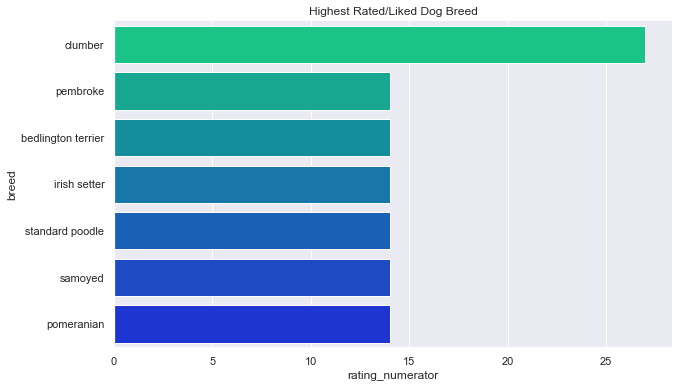

In [68]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('darkgrid')
sns.set_palette('Set3')
sns.barplot(x='rating_numerator', y = 'breed', data = top_breeds,palette="winter_r", dodge = False). set_title('Highest Rated/Liked Dog Breed');
sns.despine()

The top rated breed of dog from the analysis is the clumber with more than 25.

In [115]:
#drop the a in names
twitter_archive_master['name'][twitter_archive_master['name'].str.match('[a-z]+')] = 'None'

C:\Users\USER\AppData\Local\Temp\ipykernel_12956\109174241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_master['name'][twitter_archive_master['name'].str.match('[a-z]+')] = 'None'


In [116]:
twitter_archive_master.name.value_counts()

None      13
Cooper     3
Loki       2
Bones      2
Milo       2
          ..
Laika      1
Sophie     1
Huck       1
Winnie     1
Bayley     1
Name: name, Length: 168, dtype: int64

In [70]:
#Find the most popular dog name
pname = twitter_archive_master.name.value_counts()[1:10]
pname

Cooper    3
just      3
Pinot     2
Bones     2
Milo      2
Maggie    2
Dido      2
Bo        2
one       2
Name: name, dtype: int64

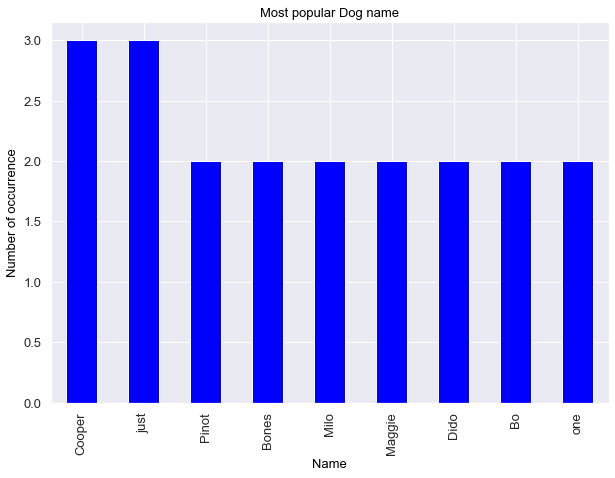

In [71]:
 #plot
g_bar = pname.plot.bar(color = 'blue', fontsize = 13)

#figure size(width, height)
g_bar.figure.set_size_inches(10, 7);

#Add labels
plt.title('Most popular Dog name', color = 'black', fontsize = '13')
plt.xlabel('Name', color = 'black', fontsize = '13')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '13');

The most popular dog name is Cooper.

In [72]:
#most used twitter source
source = twitter_archive_master['source'].value_counts()
source

Twitter for iPhone    193
TweetDeck               1
Name: source, dtype: int64

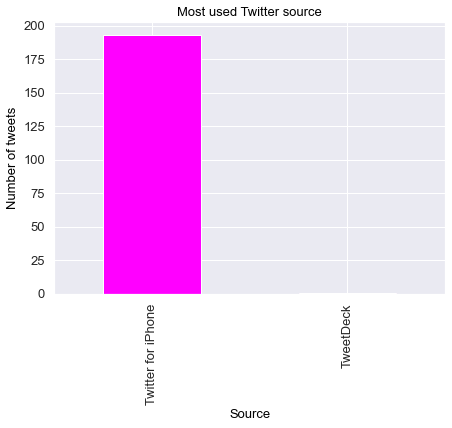

In [73]:
 #plot
g_bar = source.plot.bar(color = 'Magenta', fontsize = 13)

#figure size(width, height)
g_bar.figure.set_size_inches(7, 5);

#Add labels
plt.title('Most used Twitter source', color = 'black', fontsize = '13')
plt.xlabel('Source', color = 'black', fontsize = '13')
plt.ylabel('Number of tweets', color = 'black', fontsize = '13');

the most used twitter source is twitter for iphone

In [101]:
twitter_archive_master

,tweet_id,source,rating_numerator,rating_denominator,name,day,time,dog_stage,retweet_count,favorite_count,breed,confidence
0,890240255349198849,Twitter for iPhone,14,10,Cassie,2017-07-26,2022-09-12 15:59:51,doggo,7711,32467,pembroke,0.511319
1,884162670584377345,Twitter for iPhone,12,10,Yogi,2017-07-09,2022-09-12 21:29:42,doggo,3128,20771,german shepherd,0.707046
2,871515927908634625,Twitter for iPhone,12,10,Napolean,2017-06-04,2022-09-12 23:56:03,doggo,3628,20730,komondor,0.974781
3,869596645499047938,Twitter for iPhone,12,10,Scout,2017-05-30,2022-09-12 16:49:31,doggo,3327,16476,chihuahua,0.955156
4,851953902622658560,Twitter for iPhone,13,10,Astrid,2017-04-12,2022-09-12 00:23:33,doggo,10706,0,staffordshire bullterrier,0.757547
...,...,...,...,...,...,...,...,...,...,...,...,...
198,787717603741622272,Twitter for iPhone,13,10,Tonks,2016-10-16,2022-09-12 18:11:26,puppo,3240,11416,german shepherd,0.992339
199,751132876104687617,Twitter for iPhone,10,10,Cooper,2016-07-07,2022-09-12 19:16:47,puppo,1480,5610,labrador retriever,0.929390
200,744995568523612160,Twitter for iPhone,9,10,Abby,2016-06-20,2022-09-12 20:49:19,puppo,716,3277,old english sheepdog,0.427481
201,743253157753532416,Twitter for iPhone,10,10,Kilo,2016-06-16,2022-09-12 01:25:36,puppo,1366,4624,malamute,0.442612


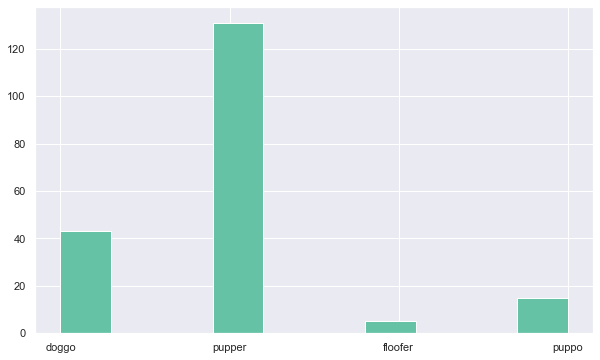

In [264]:
#view the histogram for the dog stages
twitter_archive_master.dog_stage.hist();

From the histogram pupper is the most preffered dog stage, the data can therefore be visualised to get a more clearer picture.

In [74]:
top_dog_stage = twitter_archive_master.nlargest(10, 'rating_numerator')[['dog_stage','favorite_count','retweet_count']]
top_dog_stage 

,dog_stage,favorite_count,retweet_count
72,pupper,7320,1885
0,doggo,32467,7711
8,doggo,12385,2673
13,doggo,13864,2554
18,doggo,13075,5053
19,doggo,49960,21794
20,doggo,95450,42228
39,doggo,18212,6148
55,pupper,50199,16570
67,pupper,31800,17209


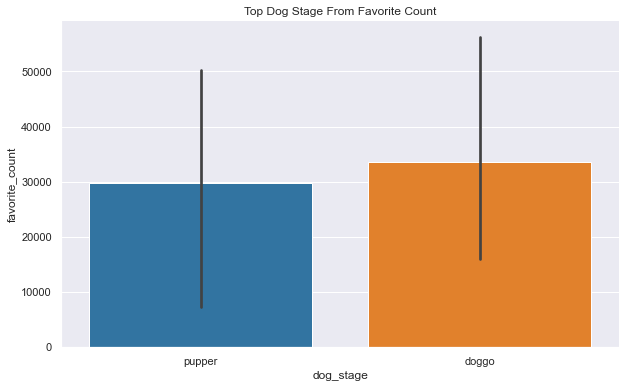

In [75]:
#view the top dog stage from the favourite count
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.barplot(x='dog_stage',y='favorite_count', data = top_dog_stage, dodge = False, palette="tab10").set_title('Top Dog Stage From Favorite Count');
sns.despine()

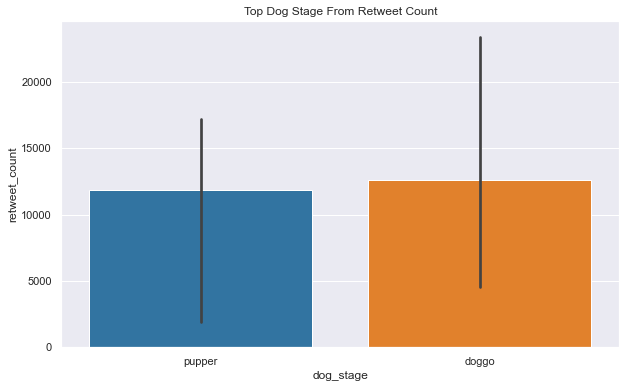

In [76]:
#view the top dog stage from the retweet count
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.barplot(x='dog_stage',y='retweet_count', data = top_dog_stage, dodge = False, palette="tab10").set_title('Top Dog Stage From Retweet Count');

doggo and pupper dominate the liked dog stages from the number of retweets and favorites.

# Conclusion

 - There were three pieces of data collected which were the twitter archive data, the image prediction tsv file and the tweet json file. Since I was not given access to twitter API I used the json file provided to work on the project.
 - After gathering and assesing the data, visualization was conducted to answer three questions which were the *Highest rated dog breed. Most popular dog names. Most used twitter source*
 - The findings are discussed in the **act_report and wrangle_report**.
